In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_empty_lattice(L): # This generates an empty 2D array of dimensions LxL with just zeros.

    empty = np.zeros((L,L), dtype = int)

    return empty

def generate_random_lattice(empty_lattice): # This iterates through the whole 2D array, assigning a random spin to each place.

    for i in range(len(empty_lattice)):
        for j in range(len(empty_lattice)):
            spin = random.choice([-1,1])
            empty_lattice[i][j] = spin

    return empty_lattice

def generate_biased_lattice(empty_lattice, L, bias): # If bias is 0.75, then 75% of the lattice will be spin up.

    lattice = empty_lattice
    flat_lattice = lattice.flatten()
    total_spins = L * L

    num_spin_up = int(total_spins * bias)
    flat_lattice[:num_spin_up] = 1
    flat_lattice[num_spin_up:] = -1

    np.random.shuffle(flat_lattice)
    lattice = flat_lattice.reshape(L,L)

    return lattice

def find_total_spin(lattice): # This iterates through the whole array, adding up all the spins.

    total_spin = 0

    for i in range(len(lattice)):
        for j in range(len(empty_lattice)):
            total_spin += lattice[i][j]

    return total_spin

def find_Hamiltonian(lattice, L): # This uses the the formula to find the energy of the lattice.

    energy = 0

    for i in range(L):
        for j in range(L):
            S = lattice[i][j]
            nb = 0
            if j + 1 < L:
                nb += lattice[i][j+1]
            if j - 1 >= 0:
                nb += lattice[i][j-1]
            if i + 1 < L:
                nb += lattice[i+1][j]
            if i - 1 >= 0:
                nb += lattice[i-1][j]
            energy += -nb*S

    return energy

def greedy(lattice, L, steps): # Keep in mind this algorithm can get stuck in a local minimum!

    old_lattice = lattice.copy()
    energy_history = []

    initial_energy = find_Hamiltonian(lattice, L)
    energy_history.append(initial_energy)

    for _ in range(steps):
        # Changes a random spin (multiply it) and accept it if it's lower.
        random_spin_coordinates = [random.randint(0,L-1)], [random.randint(0,L-1)]
        proposed_lattice = old_lattice.copy()
        proposed_lattice[random_spin_coordinates[0], random_spin_coordinates[1]] *= -1

        proposed_energy = find_Hamiltonian(proposed_lattice, L)
        old_energy = energy_history[-1]

        if proposed_energy < old_energy:
            old_lattice = proposed_lattice
            energy_history.append(proposed_energy)
        else:
            energy_history.append(old_energy)

    return old_lattice, energy_history

def simulated_annealing(lattice, L, initial_temp, cooling_rate, min_temp):   # May want to change the energy update bc this finds the hamiltonian of the whole lattice instead of making local changes.

    old_lattice = lattice.copy()
    energy_history = []
    temperature = initial_temp

    initial_energy = find_Hamiltonian(lattice, L)
    energy_history.append(initial_energy)

    while temperature > min_temp:
        random_spin_coordinates = [random.randint(0,L-1)], [random.randint(0,L-1)]
        proposed_lattice = old_lattice.copy()
        proposed_lattice[random_spin_coordinates[0], random_spin_coordinates[1]] *= -1

        proposed_energy = find_Hamiltonian(proposed_lattice, L)
        old_energy = energy_history[-1]

        if proposed_energy < old_energy or random.uniform(0,1) < math.exp(-(proposed_energy - old_energy) / temperature):
            old_lattice = proposed_lattice
            energy_history.append(proposed_energy)

        else:
            energy_history.append(old_energy)

        temperature *= cooling_rate

    return old_lattice, energy_history

# def Genetic():



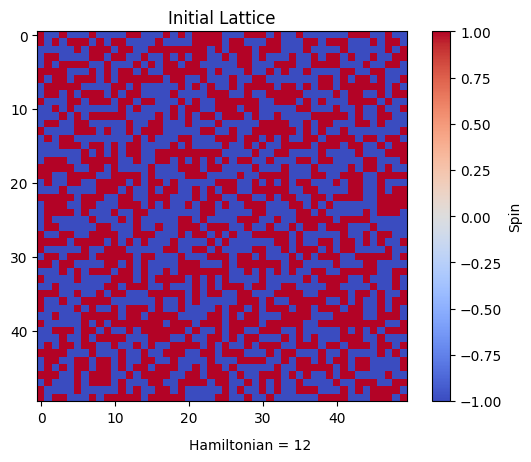

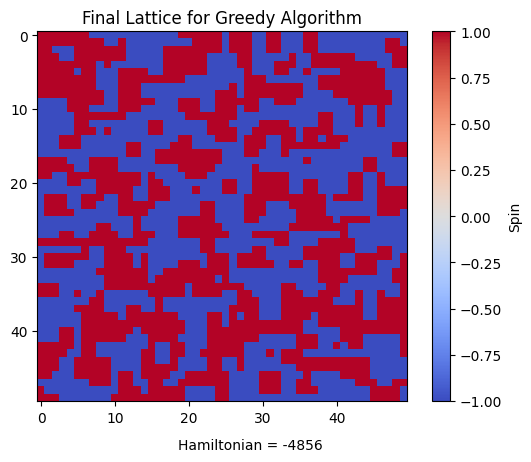

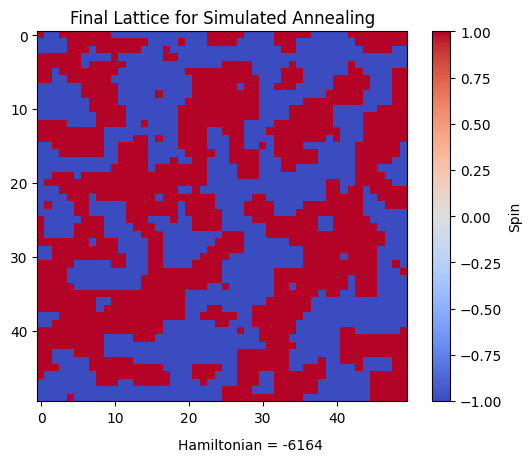

In [8]:
L = 50

empty_lattice = generate_empty_lattice(L)
lattice = generate_random_lattice(empty_lattice)
total_spin = find_total_spin(lattice)
energy = find_Hamiltonian(lattice,L)


plt.imshow(lattice, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Spin')
plt.title('Initial Lattice')
plt.figtext(0.5, 0.01, "Hamiltonian = " + str(energy), ha="center", fontsize=10)
plt.show()

steps = 5000

initial_temp = 50000
cooling_rate = 0.9975
min_temp = 1e-7
# when working with really big lattices, use a much bigger initial temp, higher cooling rate, and lower min temp

# Greedy:
greedy_minimized_lattice, greedy_energy_history = greedy(lattice, L, steps)

plt.imshow(greedy_minimized_lattice, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Spin')
plt.title('Final Lattice for Greedy Algorithm')
plt.figtext(0.5, 0.01, "Hamiltonian = " + str(greedy_energy_history[-1]), ha="center", fontsize=10)
plt.show()

# Simulated Annealing:
SA_minimized_lattice, SA_energy_history = simulated_annealing(lattice, L, initial_temp, cooling_rate, min_temp)

print(" ")
plt.imshow(SA_minimized_lattice, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Spin')
plt.title('Final Lattice for Simulated Annealing')
plt.figtext(0.5, 0.01, "Hamiltonian = " + str(SA_energy_history[-1]), ha="center", fontsize=10)
plt.show()
